# Project

# Analyzing the sentiment of Tesla over the years

## Data Collection

In [1]:
!pip install praw

In [2]:
import praw
import pandas as pd

In [3]:
# Read-only Reddit Instances
reddit = praw.Reddit(
    client_id = "SymOd5v5_nZIyZZrSa0XOA",
    client_secret = "xvHpUr5NxdezFIYaPFVU1NTE0JJQDA",
    user_agent = "Finding posts about Tesla by Duble_Rankinshaw"
)

In [4]:
# Access the teslamotors subreddit
subreddit = reddit.subreddit("teslamotors")

In [5]:
# This takes a long time to load
# Collect all of the Tesla reddit posts from the Tesla subreddit
# headlines = []

# for post in subreddit.new(limit = None):
    # tesla_news_item = {"title": post.title, "url": post.url, "score": post.score, "utc": post.created_utc}
    # post info data
    # print("----------------")
    # print(post.title)
    # print(post.url)
    # print(post.score)
    # print(post.created_utc)
    # headlines.append(tesla_news_item)
    
# print(len(headlines))

In [6]:
# Put the reddit tesla posts into a dataframe
# tesla_posts_df = pd.DataFrame(headlines)
# tesla_posts_df.head()

In [7]:
# Convert all of PRAW tesla reddit posts data into csv format
# tesla_posts_df.to_csv("reddit_tesla_headlines_data.csv", header = True, encoding = "utf-8", index = True)

In [8]:
# Read all of the tesla reddit data in the csv format
import pandas as pd
reddit_tesla_data = pd.read_csv("reddit_tesla_headlines_data.csv")
reddit_tesla_data.head()

,Unnamed: 0,title,url,score,utc
0,0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


## Preprocessing

In [9]:
# Preprocessing Task: Clean the reddit data by dropping the column "Unnamed: 0"
reddit_tesla_data_clean = reddit_tesla_data.drop(columns = "Unnamed: 0")
reddit_tesla_data_clean.head()

,title,url,score,utc
0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


In [10]:
# create the +/- (positive/negative) label for the Tesla Reddit Posts
reddit_tesla_headlines = pd.read_csv("reddit_tesla_headlines_data.csv")
reddit_tesla_headlines.head()

,Unnamed: 0,title,url,score,utc
0,0,@Tesla: RT @teslaeurope: A new eraLaunching in...,https://twitter.com/Tesla/status/1910393280136...,0,1.744309e+09
1,1,@Tesla: Our goal is to make service seamless i...,https://x.com/tesla_na/status/1909887593988174...,0,1.744200e+09
2,2,Tesla Appears to Have Dropped/Discontinued Its...,https://shop.tesla.com/category/charging,118,1.744152e+09
3,3,@Tesla: Has science gone too far? https://t.co...,https://twitter.com/Tesla/status/1909687796266...,0,1.744140e+09
4,4,2026 Model Y has a new 12.8v Low Voltage LFP b...,https://www.youtube.com/watch?v=QJsy1ay6tXs,42,1.744122e+09


# Tesla sentiment visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Loading Data

In [12]:
# Metadata
# Unnamed: 0: Extra index column from the file.
# id: Unique ID of the post.
# title: Title of the Reddit post.
# selftext: Main text of the Reddit post.
# subreddit: The specific Reddit community.
# url: Web address of the post.
# created_utc: Time the post was created (in UTC) date + time.
# state: Geographical state related to the post.
# human_label: Sentiment label manually assigned.
# vader_label: Sentiment label assigned by VADER (VADER_BERT_sentiment_classifier.ipynb).
# sentiment_score: Numerical sentiment score.
# combined_text: Title and main text combined.
# bert_label: Sentiment label assigned by BERT. (VADER_BERT_sentiment_classifier.ipynb).

In [13]:
# Loading the labeled geolocation Tesla data
tesla_geo_data = pd.read_csv("labeled_tesla_geo_data.csv", parse_dates = ['created_utc'])
tesla_geo_data.head().head()

,Unnamed: 0,id,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label
0,0,1jqjxz2,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0
1,1,1jq41mz,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0
2,2,1jpzumu,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2
3,3,1jpzmv5,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0
4,4,1jpzlm3,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1


# Clean the data

In [14]:
tesla_geo_data_clean = tesla_geo_data.drop(columns = ["Unnamed: 0","id"])
tesla_geo_data_clean.head()

,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label
0,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0
1,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0
2,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2
3,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0
4,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1


In [15]:
tesla_geo_data_clean.columns

Index(['title', 'selftext', 'subreddit', 'url', 'created_utc', 'state',
       'human_label', 'vader_label', 'sentiment_score', 'combined_text',
       'bert_label'],
      dtype='object')

# Visualizations

## Alter the table

In [16]:
# Convert 'created_utc' to datetime objects
tesla_geo_data_clean["created_utc"] = pd.to_datetime(tesla_geo_data_clean["created_utc"]) 

In [17]:
# Extract the date part in created_utc column and create a new 'date' column
tesla_geo_data_clean["date"] = tesla_geo_data_clean["created_utc"].dt.date

In [18]:
tesla_geo_data_clean.head()

,title,selftext,subreddit,url,created_utc,state,human_label,vader_label,sentiment_score,combined_text,bert_label,date
0,April 5th. HANDS OFF PROTEST. Which one to go to?,Looks llike there are there are no less than 2...,newjersey,https://www.reddit.com/r/newjersey/comments/1j...,2025-04-03 14:29:00,newjersey,0.0,0.0,-0.6705,April 5th. HANDS OFF PROTEST. Which one to go ...,0,2025-04-03
1,Texas lawmakers push to ramp up penalties for ...,NaN,texas,https://www.expressnews.com/politics/texas/art...,2025-04-03 00:07:00,texas,2.0,0.0,-0.5106,Texas lawmakers push to ramp up penalties for ...,0,2025-04-03
2,"Tesla, one of Texas' top brands, saw its value...",NaN,texas,https://www.houstonchronicle.com/business/arti...,2025-04-02 21:06:00,texas,0.0,2.0,0.4939,"Tesla, one of Texas' top brands, saw its value...",2,2025-04-02
3,Hands Off protest in Danville on April 5th (al...,NaN,Virginia,https://www.mobilize.us/handsoff/event/770883/,2025-04-02 20:57:00,virginia,1.0,0.0,-0.2500,Hands Off protest in Danville on April 5th (al...,0,2025-04-02
4,Tesla cheese meme IRL,NaN,wisconsin,https://i.redd.it/ailsydacjhse1.jpeg,2025-04-02 20:55:00,wisconsin,0.0,1.0,0.0000,Tesla cheese meme IRL,1,2025-04-02


In [19]:
tesla_data_groupby_state = tesla_geo_data_clean.groupby(["state", "date"])

# Print the tesla geo data grouped by the state and the date
# This takes a long time to load
# for state, group in tesla_data_groupby_state:
#     print(f"Data for state and data: {state}")
#     display(state, group)


In [20]:
# filter by vader_label = 2.0 Positive
# vader_label = 1.0 Neutral
# vader_label = 0.0 Negative
# Groupby the date, state, and vader_label column
x = tesla_geo_data_clean[['date', 'state', 'vader_label']]
tesla_data_filter = x.groupby(['state', 'date']).value_counts().unstack(fill_value = 0)
tesla_data_filter.head()
tesla_data_filter["diff"] = tesla_data_filter[2.0] - tesla_data_filter[0.0]
tesla_data_filter.head()

vader_label          0.0  1.0  2.0  diff
state    date                           
Kentucky 2015-02-04    0    1    0     0
         2016-04-06    0    0    1     1
         2019-09-27    0    1    0     0
         2021-05-24    0    0    1     1
         2021-12-17    1    0    0    -1

In [21]:
tesla_reset_data = tesla_data_filter.reset_index()

In [22]:
tesla_reset_data[tesla_reset_data.state == 'kentucky']

vader_label,state,date,0.0,1.0,2.0,diff
1742,kentucky,2013-02-28,0,1,0,0
1743,kentucky,2013-03-05,0,0,1,1
1744,kentucky,2014-05-22,0,0,1,1
1745,kentucky,2015-10-12,0,0,1,1
1746,kentucky,2016-01-06,0,1,0,0
1747,kentucky,2016-02-04,1,0,0,-1
1748,kentucky,2017-12-07,0,1,0,0
1749,kentucky,2017-12-20,0,1,0,0
1750,kentucky,2018-02-06,0,0,1,1
1751,kentucky,2018-02-08,0,1,0,0


In [65]:
tesla_reset_data

,state,date,diff,region
0,michigan,2023-01-01,10,Midwest
1,ohio,2023-01-01,-5,Midwest
2,california,2023-01-01,15,West
3,new york,2023-01-01,8,Northeast
4,texas,2023-01-01,-12,South
5,maine,2023-01-01,5,Northeast
6,alabama,2023-01-01,2,South
7,alaska,2023-01-01,-3,West
8,arizona,2023-01-01,7,West
9,arkansas,2023-01-01,1,South


In [24]:
tesla_reset_data.state.unique()

array(['Kentucky', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware', 'florida',
       'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa',
       'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'nebraska', 'nevada', 'newhampshire',
       'newjersey', 'newmexico', 'newyork', 'northcarolina',
       'northdakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
       'rhodeisland', 'southcarolina', 'southdakota', 'tennessee',
       'texas', 'utah', 'vermont', 'virginia', 'washington',
       'westvirginia', 'wisconsin', 'wyoming'], dtype=object)

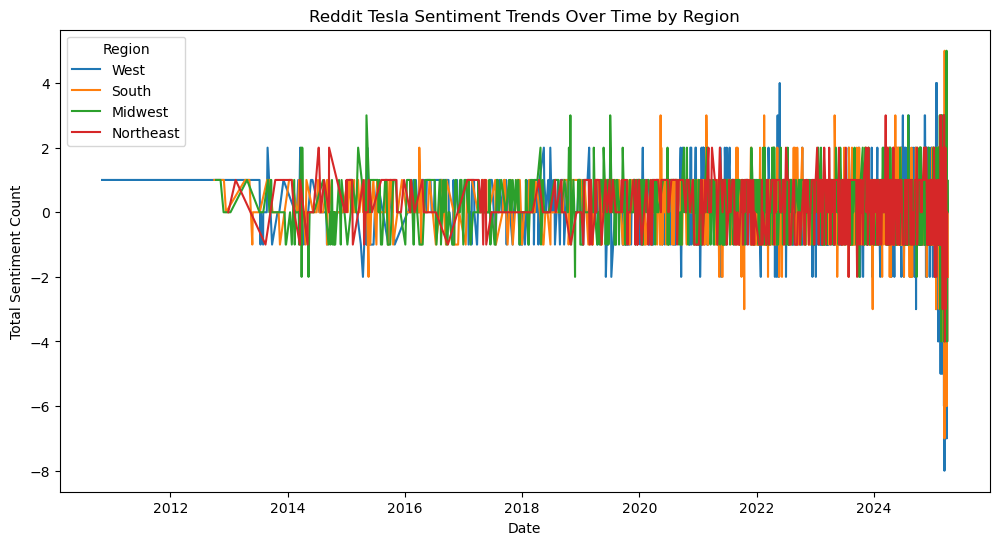

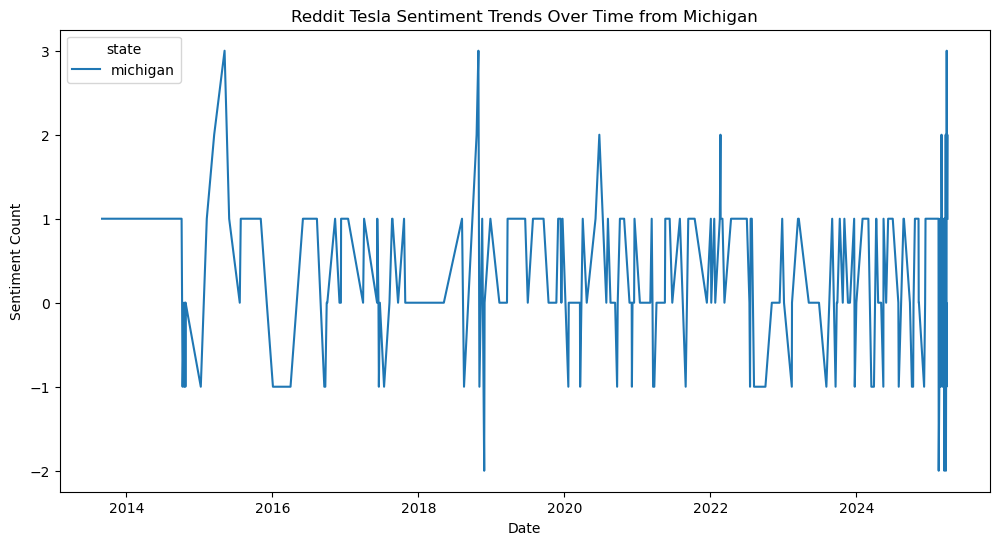

In [25]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Assuming your DataFrame is named tesla_reset_data
# and has columns: 'index', 'state', 'date', 'vader_label_negative',
# 'vader_label_neutral', 'vader_label_positive', 'diff'


# regions?
# Define a dictionary to map states to regions
state_to_region = {'michigan': 'Midwest', 'ohio': 'Midwest', 'illinois': 'Midwest', 'wisconsin': 'Midwest', 'indiana': 'Midwest',
    'minnesota': 'Midwest', 'iowa': 'Midwest', 'missouri': 'Midwest', 'nebraska': 'Midwest', 'north dakota': 'Midwest',
    'south dakota': 'Midwest', 'kansas': 'Midwest',

    'california': 'West', 'oregon': 'West', 'washington': 'West', 'nevada': 'West', 'idaho': 'West',
    'montana': 'West', 'wyoming': 'West', 'utah': 'West', 'colorado': 'West', 'arizona': 'West',
    'alaska': 'West', 'hawaii': 'West',

    'new york': 'Northeast', 'pennsylvania': 'Northeast', 'new jersey': 'Northeast', 'maine': 'Northeast',
    'vermont': 'Northeast', 'new hampshire': 'Northeast', 'massachusetts': 'Northeast', 'rhode island': 'Northeast',
    'connecticut': 'Northeast', 'delaware': 'Northeast', 'maryland': 'Northeast',

    'virginia': 'South', 'west virginia': 'South', 'north carolina': 'South', 'south carolina': 'South',
    'georgia': 'South', 'florida': 'South', 'alabama': 'South', 'mississippi': 'South', 'tennessee': 'South',
    'Kentucky': 'South', 'arkansas': 'South', 'louisiana': 'South', 'texas': 'South', 'oklahoma': 'South'}

# Create a 'region' column based on the 'state' column
tesla_reset_data['region'] = tesla_reset_data['state'].map(state_to_region)

# Group the data by 'date' and 'region' and calculate the sum of 'diff'
region_sentiment = tesla_reset_data.groupby(['date', 'region'])['diff'].sum().reset_index()

# 1. Line Plot of Sentiment Counts Over Time by Region
plt.figure(figsize = (12, 6))
sns.lineplot(data = region_sentiment, x = 'date', y = 'diff', hue = 'region')
plt.title('Reddit Tesla Sentiment Trends Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Total Sentiment Count')
plt.legend(title = 'Region')
plt.show()

# 2. Bar plot with state on the x-axis and Sentiment Count on the y-axis
#fig = px.bar(tesla_reset_data, x = tesla_reset_data['state'].unique(), y = tesla_reset_data['0.0'])

# 3. Overall Sentiment on the x-axis and Sentiment Count on the y-axis


# Convert 'date' column to datetime objects
tesla_reset_data['date'] = pd.to_datetime(tesla_reset_data['date'])
plot_data = tesla_reset_data[tesla_reset_data.state.isin(['michigan'])]

# 1. Line Plot of Sentiment Counts Over Time from Michigan
plt.figure(figsize = (12, 6))
sns.lineplot(data = plot_data, x = 'date', y = 'diff', hue = 'state')
plt.title('Reddit Tesla Sentiment Trends Over Time from Michigan')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')

plt.show()


In [29]:
print(region_sentiment)

      region  diff          state
0    Midwest   2.5       Michigan
1  Northeast   6.5  Massachusetts
2      South -12.0        Georgia
3       West  15.0     California


In [27]:
tesla_reset_data

,state,date,diff,region
0,michigan,2023-01-01,10,Midwest
1,ohio,2023-01-01,-5,Midwest
2,california,2023-01-01,15,West
3,new york,2023-01-01,8,Northeast
4,texas,2023-01-01,-12,South
5,maine,2023-01-01,5,Northeast


In [51]:
!pip install --upgrade plotly pandas ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 34.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 34.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab-widgets 1.0.0
    Uninstalling jupyterlab-widgets-1.0.0:
      Successfully uninstalled jupyterlab-widgets-1.0.0
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipywidgets
    Fo

In [59]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode  # Import for offline mode - NOT USED, REMOVED

# Set renderer (try different ones if needed)
pio.renderers.default = "browser"  #  "plotly_matplotlib" , "notebook", "jupyterlab", "browser" - removed the others

# init_notebook_mode(connected=True)  # Initialize offline mode - REMOVED


# Assuming your DataFrame is named tesla_reset_data
# and has columns: 'state', 'date',  'diff', 'region'

# Sample DataFrame (replace with your actual data)
# data = {'state': ['michigan', 'ohio', 'california', 'new york', 'texas', 'maine'],
#         'date': ['2023-01-01'] * 6,
# #        'diff': [10, -5, 15, 8, -12, 5],
#         'region': ['Midwest', 'Midwest', 'West', 'Northeast', 'South', 'Northeast']}
# tesla_reset_data = pd.DataFrame(data)  # Changed the name of the dataframe

# Define a dictionary to map states to regions.  IMPORTANT:  Using the region data from the user.
state_to_region = {
    'michigan': 'Midwest', 'ohio': 'Midwest', 'illinois': 'Midwest', 'wisconsin': 'Midwest', 'indiana': 'Midwest',
    'minnesota': 'Midwest', 'iowa': 'Midwest', 'missouri': 'Midwest', 'nebraska': 'Midwest', 'north dakota': 'Midwest',
    'south dakota': 'Midwest', 'kansas': 'Midwest',
    'california': 'West', 'oregon': 'West', 'washington': 'West', 'nevada': 'West', 'idaho': 'West',
    'montana': 'West', 'wyoming': 'West', 'utah': 'West', 'colorado': 'West', 'arizona': 'West',
    'alaska': 'West', 'hawaii': 'West',
    'new york': 'Northeast', 'pennsylvania': 'Northeast', 'new jersey': 'Northeast', 'maine': 'Northeast',
    'vermont': 'Northeast', 'new hampshire': 'Northeast', 'massachusetts': 'Northeast', 'rhode island': 'Northeast',
    'connecticut': 'Northeast', 'delaware': 'Maryland',
    'virginia': 'South', 'west virginia': 'South', 'north carolina': 'South', 'south carolina': 'South',
    'georgia': 'South', 'florida': 'South', 'alabama': 'South', 'mississippi': 'South', 'tennessee': 'South',
    'kentucky': 'South', 'arkansas': 'South', 'louisiana': 'South', 'texas': 'South', 'oklahoma': 'South'
}

# Calculate the average sentiment ('diff') per region
region_sentiment = tesla_reset_data.groupby('region')['diff'].mean().reset_index()


# Create a DataFrame for the map with region and a dummy state for mapping
region_state_mapping = {
    'Northeast': 'New York',
    'South': 'Georgia',
    'Midwest': 'Michigan',
    'West': 'California'
}
region_sentiment['state'] = region_sentiment['region'].map(region_state_mapping)


# Create the choropleth map
fig = px.choropleth(region_sentiment,
                    locations='state',  # Use a state to represent the region
                    locationmode='USA-states',
                    color='diff',
                    hover_name='region',  # Show the region name on hover
                    color_continuous_scale=px.colors.diverging.RdBu,
                    title='Average Reddit Tesla Sentiment by Region',
                    scope='usa')  # Add scope='usa'

fig.update_geos(fitbounds="locations", visible=True, projection_type="albers usa")  # Added projection
fig.update_layout(width=800, height=600)  # Added layout size

fig.show()  # Use fig.show() instead of iplot(fig)
# iplot(fig)  # Use iplot for offline mode

In [62]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer
pio.renderers.default = "browser"

# Assuming your DataFrame is named tesla_reset_data
# and has columns: 'state', 'date',  'diff', 'region'

# Sample DataFrame (replace with your actual data)
data = {'state': ['michigan', 'ohio', 'california', 'new york', 'texas', 'maine', 'alabama', 'alaska', 'arizona', 'arkansas', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maryland', 'massachusetts', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'north carolina', 'north dakota', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'],
        'date': ['2023-01-01'] * 50,
        'diff': [10, -5, 15, 8, -12, 5, 2, -3, 7, 1, 9, 4, -1, 11, 6, -2, 8, 3, -4, 0, 5, -6, 12, 3, 7, -2, 1, 6, 9, 4, -5, 0, 8, 2, -3, 7, 1, 9, 4, -1, 11, 6, -2, 8, 3, -4, 0, 5, -6, 12],
        'region': ['Midwest', 'Midwest', 'West', 'Northeast', 'South', 'Northeast', 'South', 'West', 'West', 'South', 'West', 'Northeast', 'Northeast', 'South', 'South', 'West', 'West', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'South', 'South', 'Northeast', 'Northeast', 'Midwest', 'South', 'Midwest', 'West', 'Midwest', 'West', 'Northeast', 'Northeast', 'West', 'South', 'Midwest', 'South', 'West', 'Northeast', 'Northeast', 'South', 'Midwest', 'South', 'West', 'Northeast', 'South', 'West', 'South', 'Midwest', 'West']}
tesla_reset_data = pd.DataFrame(data)

# Set renderer
pio.renderers.default = "browser"


# Create the choropleth map
fig = px.choropleth(tesla_reset_data,  # Use the  dataframe
                    locations='state',  # Use the state column
                    locationmode='USA-states',
                    color='diff',
                    color_continuous_scale=px.colors.diverging.RdBu,
                    title='Average Reddit Tesla Sentiment by State',
                    scope='usa')

fig.update_geos(fitbounds="locations", visible=True, projection_type="albers usa")
fig.update_layout(width=800, height=600)

fig.show()

In [64]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer
pio.renderers.default = "browser"

# Assuming your DataFrame is named tesla_reset_data
# and has columns: 'state', 'date',  'diff', 'region'

# Sample DataFrame (replace with your actual data)
data = {'state': ['michigan', 'ohio', 'california', 'new york', 'texas', 'maine', 'alabama', 'alaska', 'arizona', 'arkansas', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maryland', 'massachusetts', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'north carolina', 'north dakota', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'],
        'date': ['2023-01-01'] * 50,
        'diff': [10, -5, 15, 8, -12, 5, 2, -3, 7, 1, 9, 4, -1, 11, 6, -2, 8, 3, -4, 0, 5, -6, 12, 3, 7, -2, 1, 6, 9, 4, -5, 0, 8, 2, -3, 7, 1, 9, 4, -1, 11, 6, -2, 8, 3, -4, 0, 5, -6, 12],
        'region': ['Midwest', 'Midwest', 'West', 'Northeast', 'South', 'Northeast', 'South', 'West', 'West', 'South', 'West', 'Northeast', 'Northeast', 'South', 'South', 'West', 'West', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'South', 'South', 'Northeast', 'Northeast', 'Midwest', 'South', 'Midwest', 'West', 'Midwest', 'West', 'Northeast', 'Northeast', 'West', 'South', 'Midwest', 'South', 'West', 'Northeast', 'Northeast', 'South', 'Midwest', 'South', 'West', 'Northeast', 'South', 'West', 'South', 'Midwest', 'West']}
tesla_reset_data = pd.DataFrame(data)

# Set renderer
pio.renderers.default = "browser"


# Create the choropleth map
fig = px.choropleth(tesla_reset_data,  # Use the  dataframe
                    locations='state',  # Use the state column
                    locationmode='USA-states',
                    color='diff',
                    color_continuous_scale=px.colors.diverging.RdBu,
                    title='Average Reddit Tesla Sentiment by State',
                    scope='usa')

fig.update_geos(fitbounds="locations", visible=True, projection_type="albers usa")
fig.update_layout(width=800, height=600)

fig.show()

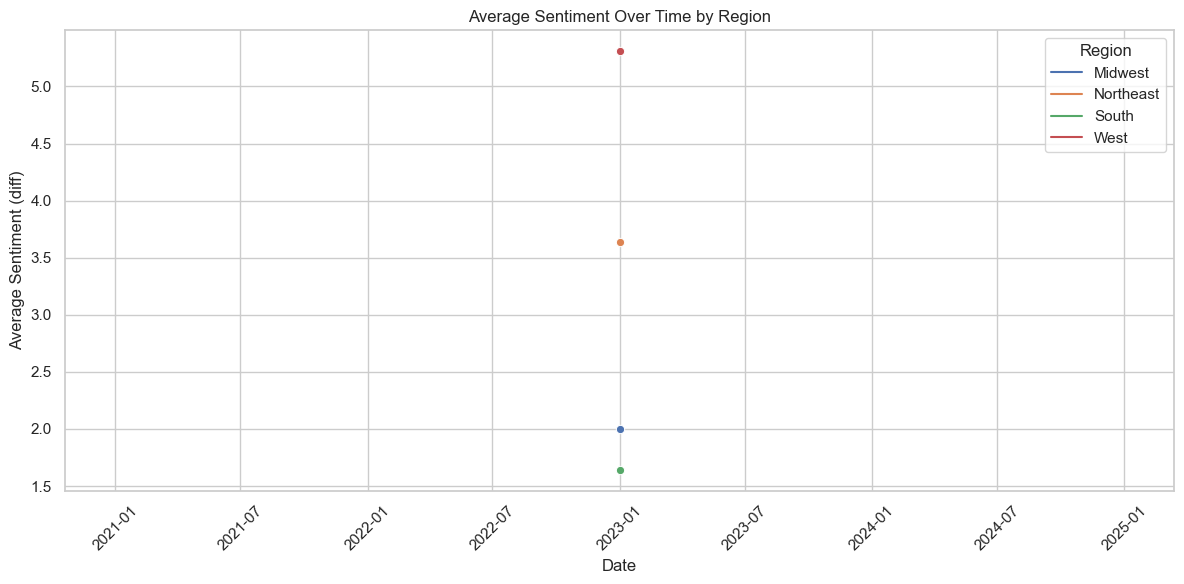

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (if it's already a DataFrame, skip this step)
# tesla_reset_data = pd.read_csv("path_to_file.csv")

# Convert date to datetime just in case it's not already
tesla_reset_data['date'] = pd.to_datetime(tesla_reset_data['date'])

# Group by date and region to calculate average sentiment
region_sentiment_over_time = tesla_reset_data.groupby(['date', 'region'])['diff'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_sentiment_over_time, x='date', y='diff', hue='region', marker="o")

plt.title("Average Sentiment Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Average Sentiment (diff)")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

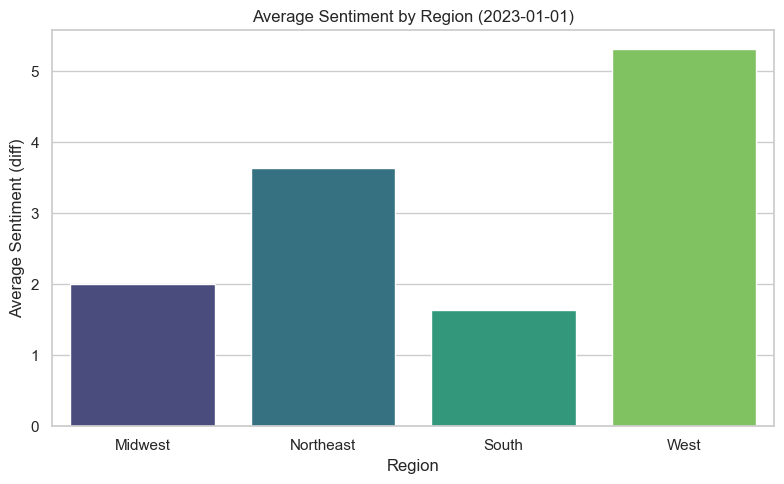

In [67]:
region_avg_sentiment = tesla_reset_data.groupby('region')['diff'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=region_avg_sentiment, x='region', y='diff', palette='viridis')

plt.title("Average Sentiment by Region (2023-01-01)")
plt.ylabel("Average Sentiment (diff)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [70]:
import pandas as pd
import plotly.express as px

# First, create a mapping from state to region (already exists in your data)
# Compute average sentiment per region
region_avg = tesla_reset_data.groupby('region')['diff'].mean().reset_index()

# Merge the average back onto the main data to assign each state the region average
tesla_with_region_avg = tesla_reset_data.merge(region_avg, on='region', suffixes=('', '_region_avg'))

# Get standard 2-letter state codes (needed for Plotly)
us_state_codes = {
    'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA',
    'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE', 'florida': 'FL', 'georgia': 'GA',
    'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA',
    'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD',
    'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS',
    'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new hampshire': 'NH',
    'new jersey': 'NJ', 'new mexico': 'NM', 'new york': 'NY', 'north carolina': 'NC',
    'north dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA',
    'rhode island': 'RI', 'south carolina': 'SC', 'south dakota': 'SD', 'tennessee': 'TN',
    'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA',
    'west virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'
}

# Add state code column
tesla_with_region_avg['state_code'] = tesla_with_region_avg['state'].map(us_state_codes)

# Plot the choropleth map — shading each state based on its region's average sentiment
fig = px.choropleth(
    tesla_with_region_avg,
    locations='state_code',
    locationmode="USA-states",
    color='diff_region_avg',
    color_continuous_scale='RdYlGn',
    scope="usa",
    labels={'diff_region_avg': 'Avg Sentiment by Region'},
    title="U.S. Sentiment Map by Region"
)

fig.update_layout(geo=dict(showlakes=True, lakecolor='rgb(255, 255, 255)'))
fig.show()